# Lab16: Linear Regression
##### Paul Leonard 11/30/2020

Required Features:
- [x] Load the data you receive into a Pandas DataFrame.
- [x] Show the first five rows of the data set.
- [x] Show the description and the info of the data set.
- [x] Ensure that any date columns have been cast into a datetime object in your DataFrame.
- [x] Using a regression model, split your data into train and test data.
- [x] Fit your training split to the regression model.
- [x] Show your regression model’s score.
- [x] Draw at least three conclusions from your regression model.
- [x] Your notebook should be clutter free and polished.

## Importing data and libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data.csv")

## Converting from metric

In [35]:
df['Weight_lbs'] = df['Weight']*2.20462
df['Height_in'] = df['Height']*39.3701

## Show the first five rows of the data set

In [36]:
df.head(5)

,Height,Weight,Weight_lbs,Height_in
0,1.47,52.21,115.103210,57.874047
1,1.50,53.12,117.109414,59.055150
2,1.52,54.48,120.107698,59.842552
3,1.55,55.84,123.105981,61.023655
4,1.57,57.20,126.104264,61.811057


## Show the info of the data set

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Height      15 non-null     float64
 1   Weight      15 non-null     float64
 2   Weight_lbs  15 non-null     float64
 3   Height_in   15 non-null     float64
dtypes: float64(4)
memory usage: 608.0 bytes


## Show the description of the data set

In [38]:
df.describe()

,Height,Weight,Weight_lbs,Height_in
count,15.000000,15.000000,15.000000,15.000000
mean,1.650667,62.078000,136.858400,64.986912
std,0.114235,7.037515,15.515046,4.497424
min,1.470000,52.210000,115.103210,57.874047
25%,1.560000,56.520000,124.605122,61.417356
50%,1.650000,61.290000,135.121160,64.960665
75%,1.740000,67.190000,148.128418,68.503974
max,1.830000,74.460000,164.156005,72.047283


## Breaking dataframe into component vectors and plotting

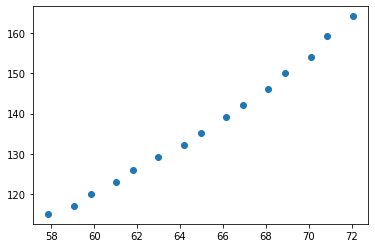

In [39]:
height_values = df["Height_in"].values
weight_values = df["Weight_lbs"].values
plt.scatter(height_values, weight_values)
plt.show()

## Shape data into the input format for linear regression

In [41]:
height_vector = height_values.reshape(-1,1)
X = height_vector
y = weight_values

## Split data between train and test data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
# print(x_train.shape)
# print(x_test)
# print(y_train.shape)
# print(y_test)

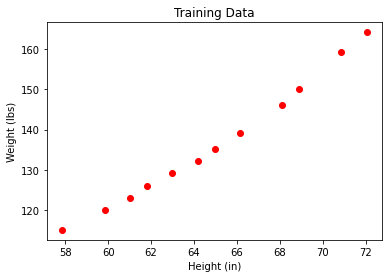

In [46]:
plt.scatter(x_train,y_train,color='red')
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")
plt.title("Training Data")
plt.show()

## Fit the training split to a regression model

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

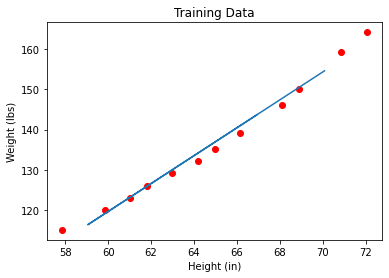

In [50]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)

plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")
plt.title("Training Data")
plt.plot
#question: plot vs show?

## What is the regression model's score?

In [52]:
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 98.73 %
Test accuracy 99.57 %


## Draw 3 conclusions from the data
1. Small datasets are very easy to work with and allowed me to see each step and reshaping clearly; I look forward to plugging in a larger data set now.
1. This data set linearity seems too good to be true.  It seems like it had to be made up.  However, the description on kaggle did list it as being hyper-selected down to a 9 year agespan of females.
1. I agree with the end result showing that as height increases, typically weight does as well.